Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StanModels
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path_s("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,6.94775,3.06312,3.08551
2,8.19919,3.82216,3.83616
3,11.5942,5.42029,5.41362
4,9.42412,4.36862,4.32747
5,9.55294,4.55522,4.51782


Define the Stan language model

In [8]:
m_5_8 = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [9]:
stanmodel = Stanmodel(name="m_5_8", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8, output_format=:mcmcchains);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan will be updated.

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = a, bl, br, sigma

Empirical Posterior Estimates
──────────────────────────────────────────
parameters
       Mean    SD   Naive SE  MCSE   ESS
    a 0.7535 0.3272   0.0052 0.0070 1000
   bl 1.1913 1.6830   0.0266 0.0395 1000
   br 0.8393 1.6859   0.0267 0.0399 1000
sigma 0.5952 0.0434   0.0007 0.0010 1000

Quantiles
──────────────────────────────────────────
parameters
        2.5%   25.0%   50.0%  75.0%  97.5%
    a -0.3986  0.5331 0.7566 0.9663 1.9237
   bl -4.0828  0.0741 1.1930 2.3369 6.8650
   br -4.9025 -0.3136 0.8398 1.9403 6.1887
sigma  0.4614  0.5647 0.5923 0.6225 0.7822



Plot the density of posterior draws

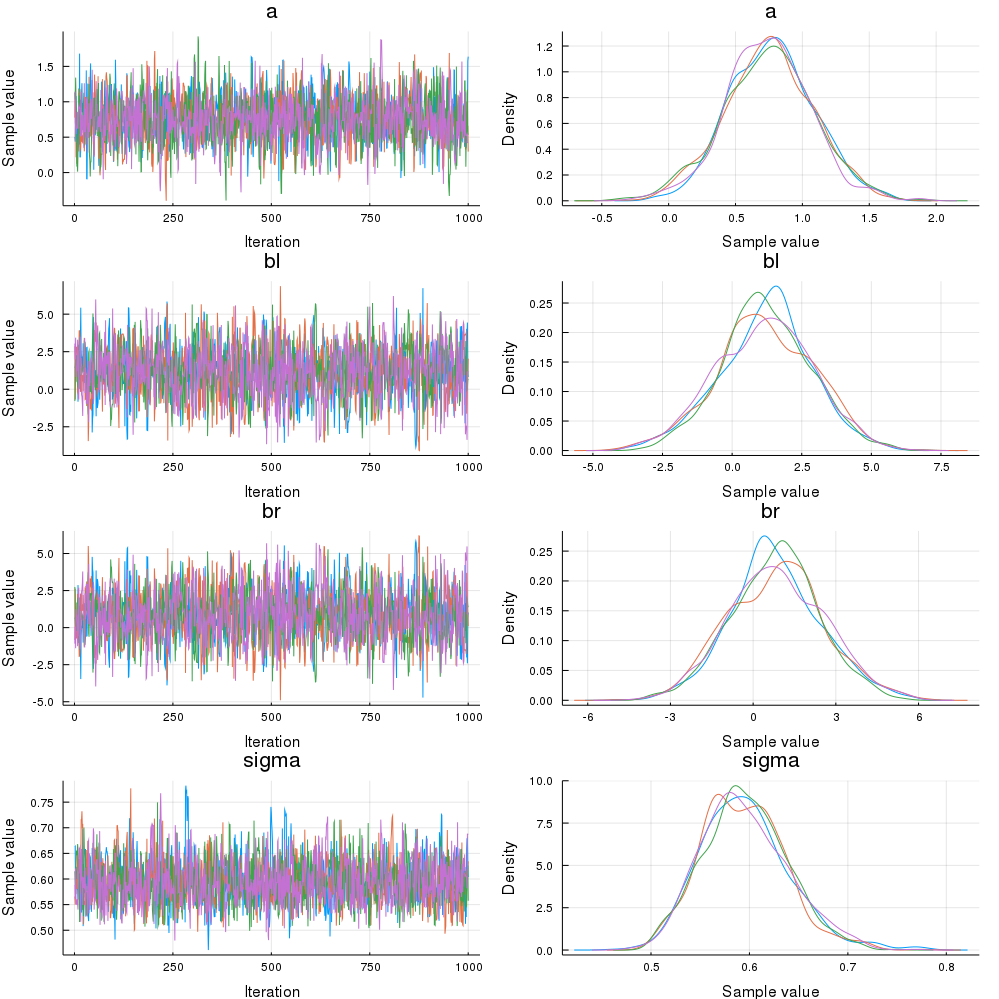

In [10]:
plot(chn)

Autocorrelation

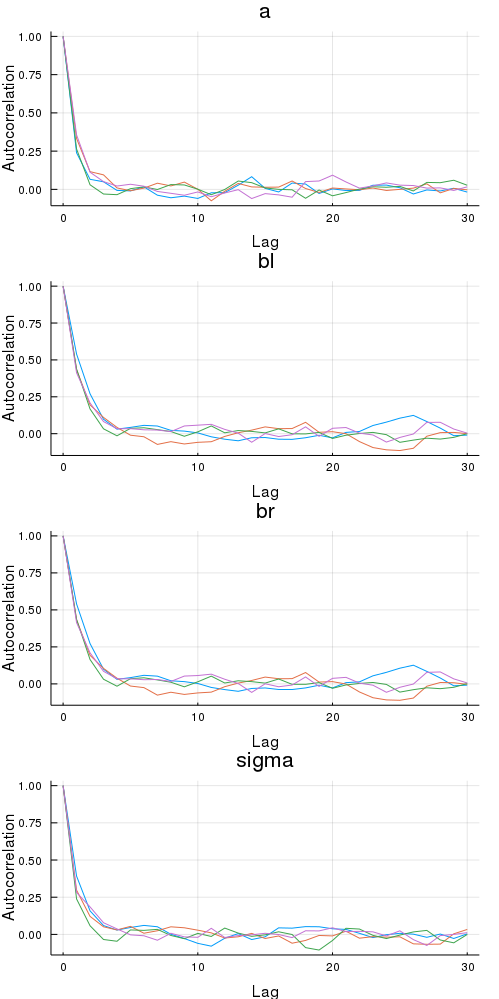

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*